In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../Data/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


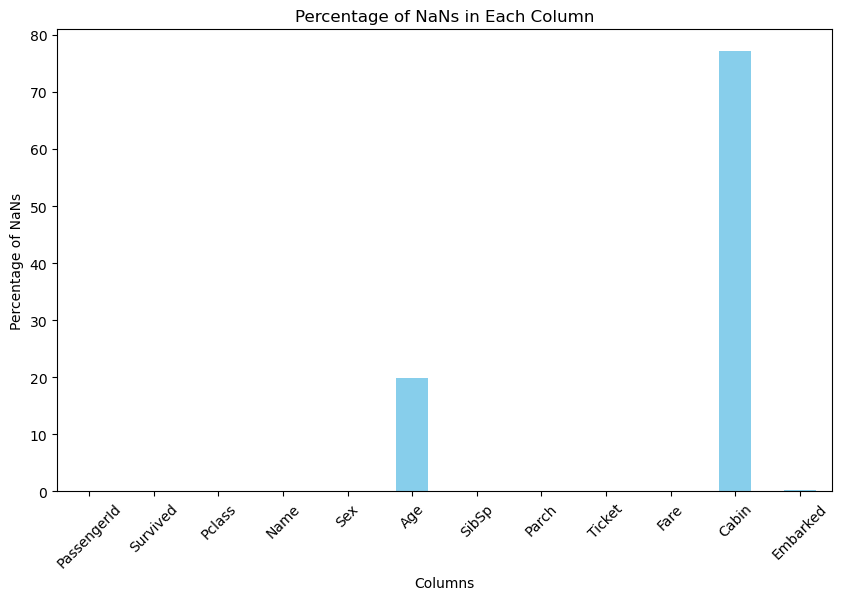

In [3]:
# Calculate the percentage of NaNs in each column
nan_percentage = (train.isna().sum() / len(train)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaNs in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaNs')
plt.xticks(rotation=45)
plt.show()

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train = pd.get_dummies(train, columns=['Embarked'])
train['is_male'] = pd.get_dummies(train['Sex'])['male']
train = train.drop(columns='Sex')
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,is_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,1


<Axes: >

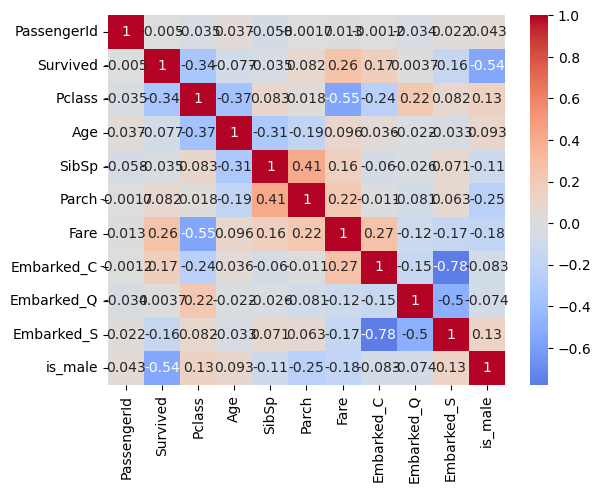

In [7]:
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


In [8]:
train.sort_values(by="Name")

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,is_male
845,846,0,3,"Abbing, Mr. Anthony",42.0,0,0,C.A. 5547,7.5500,NaN,0,0,1,1
746,747,0,3,"Abbott, Mr. Rossmore Edward",16.0,1,1,C.A. 2673,20.2500,NaN,0,0,1,1
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",35.0,1,1,C.A. 2673,20.2500,NaN,0,0,1,0
308,309,0,2,"Abelson, Mr. Samuel",30.0,1,0,P/PP 3381,24.0000,NaN,1,0,0,1
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,1,0,P/PP 3381,24.0000,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",30.0,0,0,345774,9.5000,NaN,0,0,1,1
282,283,0,3,"de Pelsmaeker, Mr. Alfons",16.0,0,0,345778,9.5000,NaN,0,0,1,1
361,362,0,2,"del Carlo, Mr. Sebastiano",29.0,1,0,SC/PARIS 2167,27.7208,NaN,1,0,0,1
153,154,0,3,"van Billiard, Mr. Austin Blyler",40.5,0,2,A/5. 851,14.5000,NaN,0,0,1,1


In [9]:
train[train['Fare']== 512.3292]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,is_male
258,259,1,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,512.3292,NaN,1,0,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",36.0,0,1,PC 17755,512.3292,B51 B53 B55,1,0,0,1
737,738,1,1,"Lesurer, Mr. Gustave J",35.0,0,0,PC 17755,512.3292,B101,1,0,0,1


In [11]:
test=pd.read_csv("../Data/test.csv")
test[test['Name'].str.startswith("Cardeza")]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [13]:
test[test['Fare']> ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [15]:
train["Ticket"].value_counts()

train[train['Ticket']== "347082"]

train[train['Fare']== 512.3292]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,is_male
13,14,0,3,"Andersson, Mr. Anders Johan",39.0,1,5,347082,31.275,NaN,0,0,1,1
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",2.0,4,2,347082,31.275,NaN,0,0,1,0
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",9.0,4,2,347082,31.275,NaN,0,0,1,0
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",11.0,4,2,347082,31.275,NaN,0,0,1,0
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",39.0,1,5,347082,31.275,NaN,0,0,1,0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",6.0,4,2,347082,31.275,NaN,0,0,1,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",4.0,4,2,347082,31.275,NaN,0,0,1,1


In [20]:
test[test['Name'].str.contains("Wood")]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
